<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-cnn/blob/main/caries_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="qGaBcdFPu8o5nVzk6TVH")
project = rf.workspace("gabriels").project("tooth-segmentation-ra8um")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

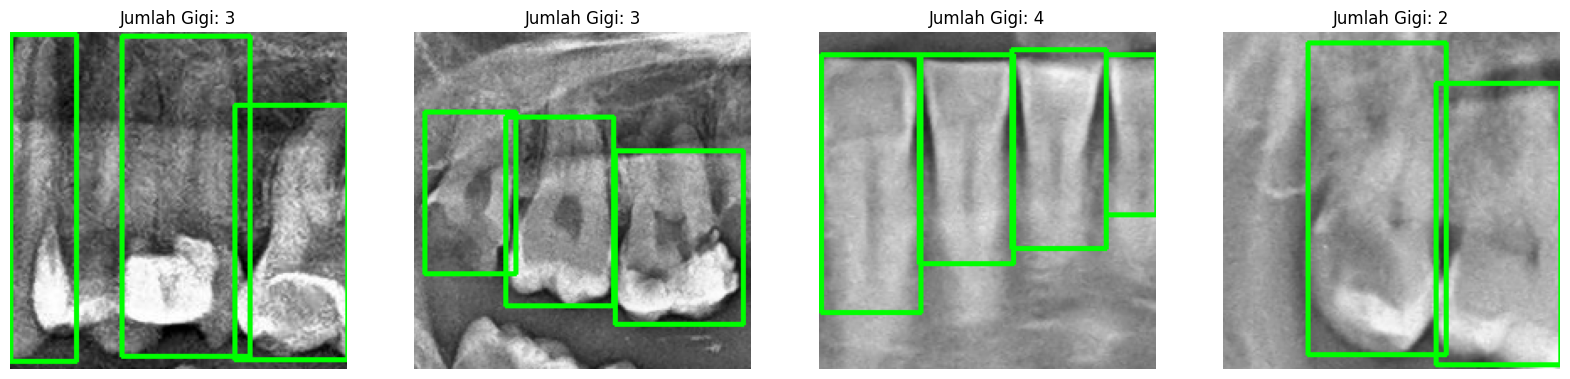

In [ ]:
image_folder = '/content/drive/MyDrive/dataset/caries-detection/periapical'

segmented_images = []

for filename in os.listdir(image_folder):
  image_path = os.path.join(image_folder, filename)
  result = model.predict(image_path)
  image = Image.open(image_path)

  image_np = np.array(image)
  image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
  num_teeth = len(result.json()['predictions'])

  for box in result.json()['predictions']:
      x1 = int(box['x'] - box['width'] / 2)
      y1 = int(box['y'] - box['height'] / 2)
      x2 = int(box['x'] + box['width'] / 2)
      y2 = int(box['y'] + box['height'] / 2)
      cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

  segmented_images.append((image_cv, num_teeth))

selected_images = random.sample(segmented_images, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (image_cv, num_teeth) in enumerate(selected_images):
    axes[i].imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Jumlah Gigi: {num_teeth}")
    axes[i].axis('off')

plt.show()

In [ ]:
save_folder = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth'
os.makedirs(save_folder, exist_ok=True)

tooth_count = 0

for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    result = model.predict(image_path)
    image = Image.open(image_path)

    image_np = np.array(image)
    image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for i, box in enumerate(result.json()['predictions']):
        x1 = int(box['x'] - box['width'] / 2)
        y1 = int(box['y'] - box['height'] / 2)
        x2 = int(box['x'] + box['width'] / 2)
        y2 = int(box['y'] + box['height'] / 2)

        tooth_image = image_cv[y1:y2, x1:x2]

        resized_tooth = cv2.resize(tooth_image, (128, 128))

        save_path = os.path.join(save_folder, f"{filename[:-4]}_tooth_{i}.jpg")
        cv2.imwrite(save_path, resized_tooth)

        tooth_count += 1

print(f"Total teeth saved: {tooth_count}")

Total teeth saved: 740


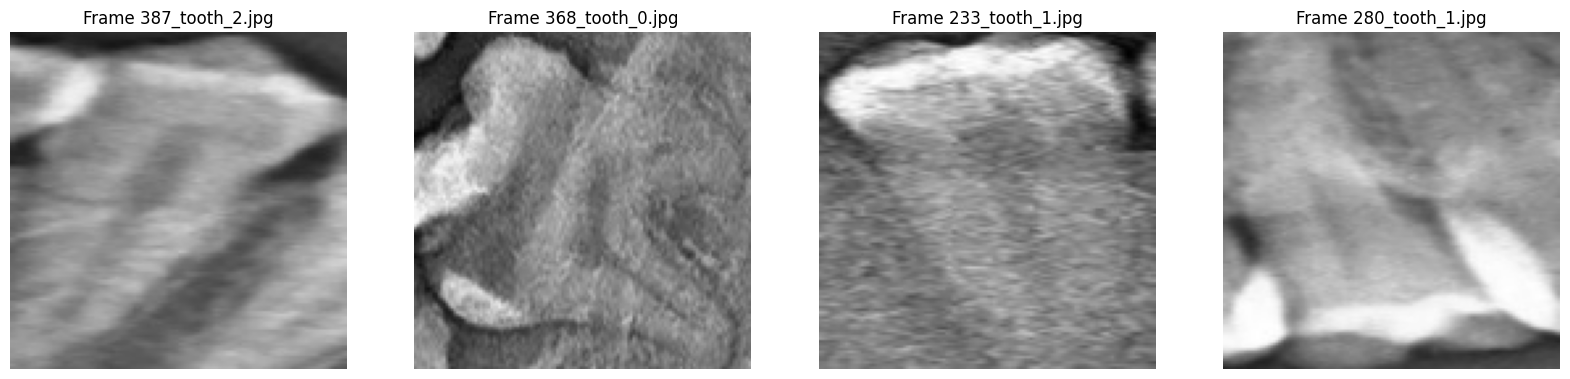

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

image_folder = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

selected_images = random.sample(image_files, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image_file in enumerate(selected_images):
  image_path = os.path.join(image_folder, image_file)
  img = mpimg.imread(image_path)
  axes[i].imshow(img)
  axes[i].set_title(image_file)
  axes[i].axis('off')

plt.show()

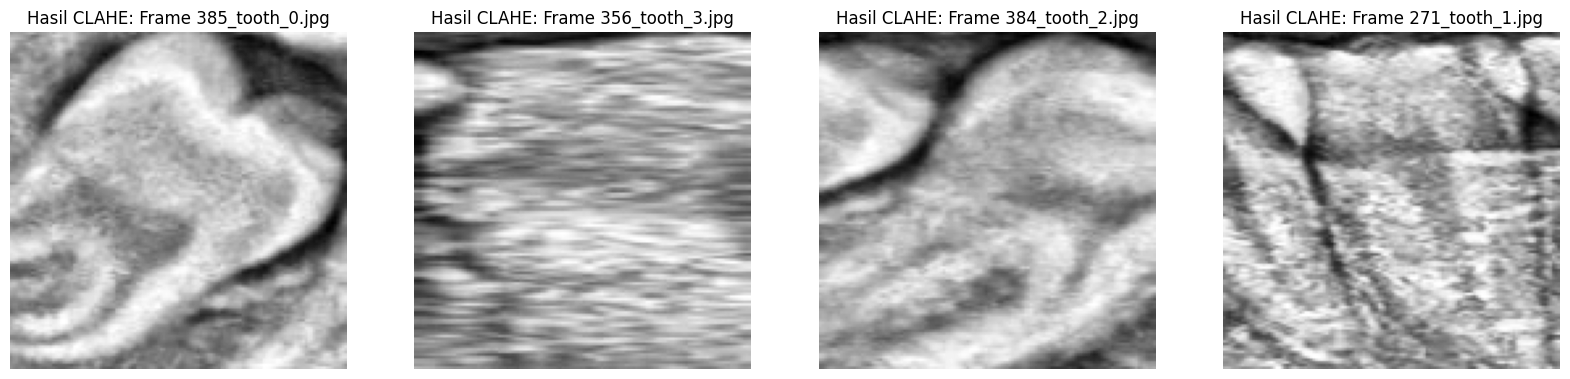

In [ ]:
image_folder = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

selected_images = random.sample(image_files, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i, image_file in enumerate(selected_images):
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    equ = clahe.apply(img)

    axes[i].imshow(equ, cmap='gray')
    axes[i].set_title(f"Hasil CLAHE: {image_file}")
    axes[i].axis('off')

plt.show()

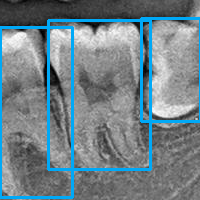

In [14]:
image_path = '/content/drive/MyDrive/dataset/caries-detection/periapical/Frame 274.jpg'
result = model.predict(image_path)

from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = Image.open(image_path)
image_np = np.array(image)
image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

for box in result.json()['predictions']:
    x1 = int(box['x'] - box['width'] / 2)
    y1 = int(box['y'] - box['height'] / 2)
    x2 = int(box['x'] + box['width'] / 2)
    y2 = int(box['y'] + box['height'] / 2)

    cv2.rectangle(image_cv, (x1, y1), (x2, y2), (247, 169, 0), 2)

cv2_imshow(image_cv)

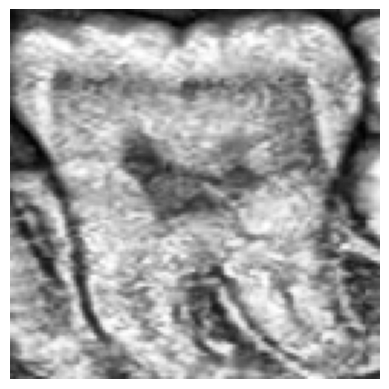

In [19]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth/Frame 274_tooth_0.jpg'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

equ = clahe.apply(img)

plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()